# Realtime pollution analysis

Getting data

In [25]:
import requests

In [26]:
city = 'udaipur'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '6c2d83b45183101979ae2dd7c73b34733d4982e2'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 55,
 'idx': 11314,
 'attributions': [{'url': 'http://cpcb.nic.in/',
   'name': 'CPCB - India Central Pollution Control Board',
   'logo': 'India-CPCB.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [24.5876534, 73.6974682],
  'name': 'Ashok Nagar, Udaipur, India',
  'url': 'https://aqicn.org/city/india/udaipur/ashok-nagar'},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 6.8},
  'dew': {'v': 14},
  'h': {'v': 50.120000000000005},
  'no2': {'v': 5},
  'o3': {'v': 18.5},
  'p': {'v': 731.4899999999999},
  'pm10': {'v': 33},
  'pm25': {'v': 55},
  'so2': {'v': 4.9},
  't': {'v': 29.776666666666667},
  'w': {'v': 1.5066666666666666},
  'wg': {'v': 9.2}},
 'time': {'s': '2021-06-03 07:00:00',
  'tz': '+05:30',
  'v': 1622703600,
  'iso': '2021-06-03T07:00:00+05:30'},
 'forecast': {},
 'debug': {'sync': '2021-06-03T11:39:32+09:00'}}

Extracting air quality information

In [13]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


co : 6.2
dew : 14
h : 52.225
no2 : 4
o3 : 22.8
pm10 : 33
pm25 : 39
so2 : 3.4
t : 29.335
w : 1.525
wg : 9.2


In [7]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)


udaipur AQI : 39 

Individual Air quality
Dew : {'v': 14}
no2 : {'v': 4}
Ozone : {'v': 22.8}
sulphur : {'v': 3.4}
pm10 : {'v': 3.4}
pm25 : {'v': 39}


Plotting pollutants graph


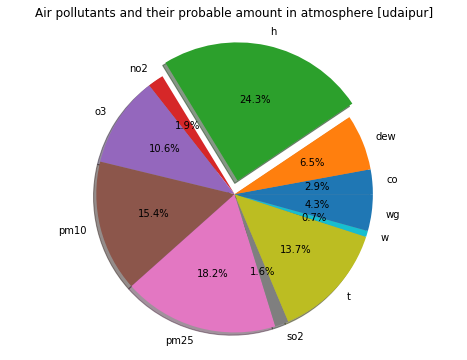

In [17]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [udaipur]')

plt.axis('equal')
plt.show()


Plotting location on the map using cartopy

Plotting a map of the city

In [19]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1] + 3,geo[0]-2,f'{city} AQI \n    {aqi}',color='red')

plt.show()


ModuleNotFoundError: No module named 'cartopy'

# Historical data analysis

Read csv files into a dataframe

In [6]:
import pandas as pd

In [7]:
csv_path ='ashok-nagar, udaipur-air-quality.csv'

df = pd.read_csv(csv_path)
df = df.head(50)
print(df)

         date  pm25  pm10   o3  no2  so2  co
0    2020/5/1    85    40   27    2    2   2
1    2020/5/2    79    60   21    1    3   2
2    2020/5/3   119    58   30   10    4   4
3    2020/5/4   111    49   28   13    6   6
4    2020/5/5    99    64   24    5    6   5
5    2020/5/6    92                         
6    2020/5/8    80    42   25    2    3   3
7    2020/5/9    71    45   29    3    5   4
8   2020/5/10    82    55   29    3    5   3
9   2020/5/11   104    42   36    3    5   3
10  2020/5/12    87    55   22    4    5   3
11  2020/5/13    99    47   18    3    3   3
12  2020/5/14    90    52   22    3    4   3
13  2020/5/15    78    51   29    3    4   3
14  2020/5/16    78    53   32    3    3   3
15  2020/5/17    77   156   34    4    8   3
16  2020/5/18   116    39   26    4    3   3
17  2020/5/19    79    45   28    5    4   3
18  2020/5/20    91    60   28    3    5   4
19  2020/5/21    99    66   24    3    3   3
20  2020/5/22   102    61   20    4    3   3
21  2020/5

Renaming column names 

In [8]:
df.columns

df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

Extract dates of lockdown

In [9]:
df['date'] = pd.to_datetime(df.date)

df21 = df.loc[df['date'] > '2020-03-24']
df21 = df21.sort_values(by = 'date')
df21


,date,pm25,pm10,o3,no2,so2,co
28,2020-04-01,85,43,33,2,2,1
29,2020-04-02,71,38,34,1,2,1
30,2020-04-03,68,37,34,2,5,6
31,2020-04-04,66,43,28,3,5,4
32,2020-04-05,77,50,26,3,5,4
33,2020-04-06,90,55,24,2,5,5
34,2020-04-07,94,61,21,2,5,5
35,2020-04-08,94,61,23,2,4,3
36,2020-04-09,93,60,22,3,3,3
37,2020-04-10,106,56,25,2,3,4


Remove any extra date apart from lockdown

In [68]:
df21.drop(13, inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
28,2020-04-01,85,43,33,2,2,1
29,2020-04-02,71,38,34,1,2,1
30,2020-04-03,68,37,34,2,5,6
31,2020-04-04,66,43,28,3,5,4
32,2020-04-05,77,50,26,3,5,4
33,2020-04-06,90,55,24,2,5,5
34,2020-04-07,94,61,21,2,5,5
35,2020-04-08,94,61,23,2,4,3
36,2020-04-09,93,60,22,3,3,3
37,2020-04-10,106,56,25,2,3,4


Filling all the empty cells with 0

In [69]:
df21.replace(' ', '0', inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
28,2020-04-01,85,43,33,2,2,1
29,2020-04-02,71,38,34,1,2,1
30,2020-04-03,68,37,34,2,5,6
31,2020-04-04,66,43,28,3,5,4
32,2020-04-05,77,50,26,3,5,4
33,2020-04-06,90,55,24,2,5,5
34,2020-04-07,94,61,21,2,5,5
35,2020-04-08,94,61,23,2,4,3
36,2020-04-09,93,60,22,3,3,3
37,2020-04-10,106,56,25,2,3,4


Plotting the data

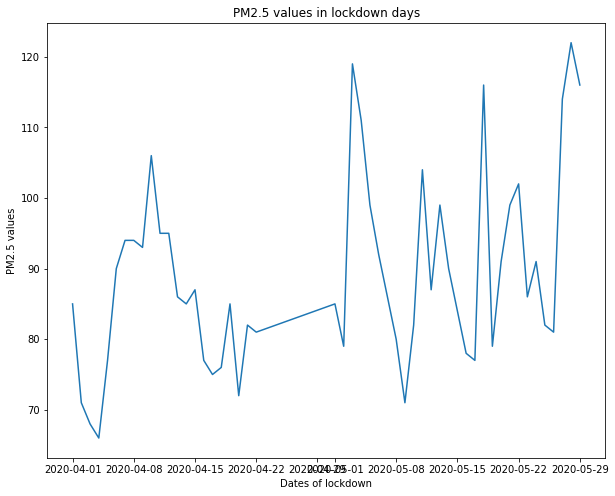

In [70]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25 = df21['pm25']
pm25 = [int(i) for i in pm25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates,pm25)
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')
plt.show()

Extracting past data before lockdown

In [71]:
mask = (df['date'] >= '2020-03-05') & (df['date']  < '2020-05-29')

past21 = df.loc[mask]
past21

,date,pm25,pm10,o3,no2,so2,co
0,2020-05-01,85,40,27,2,2,2
1,2020-05-02,79,60,21,1,3,2
2,2020-05-03,119,58,30,10,4,4
3,2020-05-04,111,49,28,13,6,6
4,2020-05-05,99,64,24,5,6,5
5,2020-05-06,92,,,,,
6,2020-05-08,80,42,25,2,3,3
7,2020-05-09,71,45,29,3,5,4
8,2020-05-10,82,55,29,3,5,3
9,2020-05-11,104,42,36,3,5,3


Compairing the two

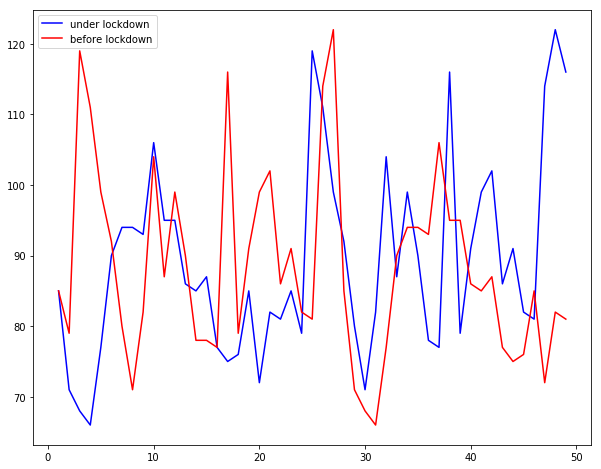

In [72]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25_l = df21['pm25']
pm25_l = [int(i) for i in pm25]


pm25_n = past21['pm25']
pm25_n = [int(i) for i in pm25_n]

plt.figure(figsize=(10,8))

length = [i for i in range(1,len(dates)+1)]
#length

plt.plot(length,pm25_l,color='blue',label='under lockdown')
plt.plot(length,pm25_n,color='red',label='before lockdown')
plt.legend()
# plt.title('Comparision of before lockdown vs under lockdown pm2.5 values')
# plt.show()

Finding solutions to several questions

1> On which date pm2.5 value was minimum in Udaipur under lockdown

In [73]:
df21['pm25'] = [int(i) for i in df21['pm25']]
print(df21[df21.pm25 == df21.pm25.min()]) 

         date  pm25 pm10   o3 no2 so2  co
31 2020-04-04    66   43   28   3   5   4


2> On which date o3 value was maximum in Udaipur under lockdown

In [74]:
df21['o3'] = [int(i) for i in df21['o3']]
print(df21[df21.o3 == df21.o3.max()]) 

        date  pm25 pm10  o3 no2 so2  co
9 2020-05-11   104   42  36   3   5   3


3> What is the average value of so2 in the lockdown 

In [75]:
df21['so2'] = [int(i) for i in df21['so2']]
avgSo2 = df21['so2'].mean()
print('The average value of so2 :',avgSo2)

The average value of so2 : 3.6530612244897958
